In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
sns.set() # Activar módulo de seaborn

In [2]:
#Cargue de datos
df = pd.read_excel(r"D:\Users\MARIAFLOREZ\Documents\10mo Semestre\T2\Encuesta_Empresa_cod.xlsx")
df.columns

Index(['Sector económico', 'Años de operación', 'Total trabajadores',
       'Almacenamiento de datos ', 'Estímulo habilidades digitales',
       'Aprovechamiento recursos tecnológicos',
       'Orientación transformación digital',
       'Estrategia empresarial e inversión en tecnologías',
       'Monitoreo transformación digital', 'Datos en tiempo real',
       'Captación y monitoreo de datos en las redes/web', 'Ciberseguridad',
       'Responsables de transformación digital  ',
       'Proyectos para orientar la TD',
       'Identificación de tecnologías para apropiación',
       'Computación en la nube', 'Analítica de datos', 'Big Data',
       'Robótica y automatización', 'Internet de las cosas',
       'Manufactura aditiva/Impresión 3D',
       'Machine Learning o Aprendizaje automático', 'Ciberseguridad3',
       'Nanotecnología', 'Biotecnología', 'Realidad virtual',
       'Realidad aumentada', 'Blockchain', 'Business Intelligence',
       'Materiales avanzados', 'Inteligencia 

## Estadísticas descriptivas

#### Medidas de tendencia central

In [3]:
import statistics
from statistics import multimode
#data = df.describe()
#data.loc["mediana"] = round(df.median(), 2)
#data.loc["moda"] = df.mode().mean()
#data.to_csv("Descriptivos.csv", decimal = ',') # se le puede decir que el decimal sea una , y no punto


## Gráficas

<ipython-input-19-e100ff88c554>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum_td = round(df.groupby(['Total trabajadores'])['Estímulo habilidades digitales', 'Aprovechamiento recursos tecnológicos', 'Orientación transformación digital', 'Estrategia empresarial e inversión en tecnologías', 'Monitoreo transformación digital', 'Datos en tiempo real', 'Captación y monitoreo de datos en las redes/web', 'Ciberseguridad', 'Responsables de transformación digital  ','Proyectos para orientar la TD','Identificación de tecnologías para apropiación'].mean(), 2)


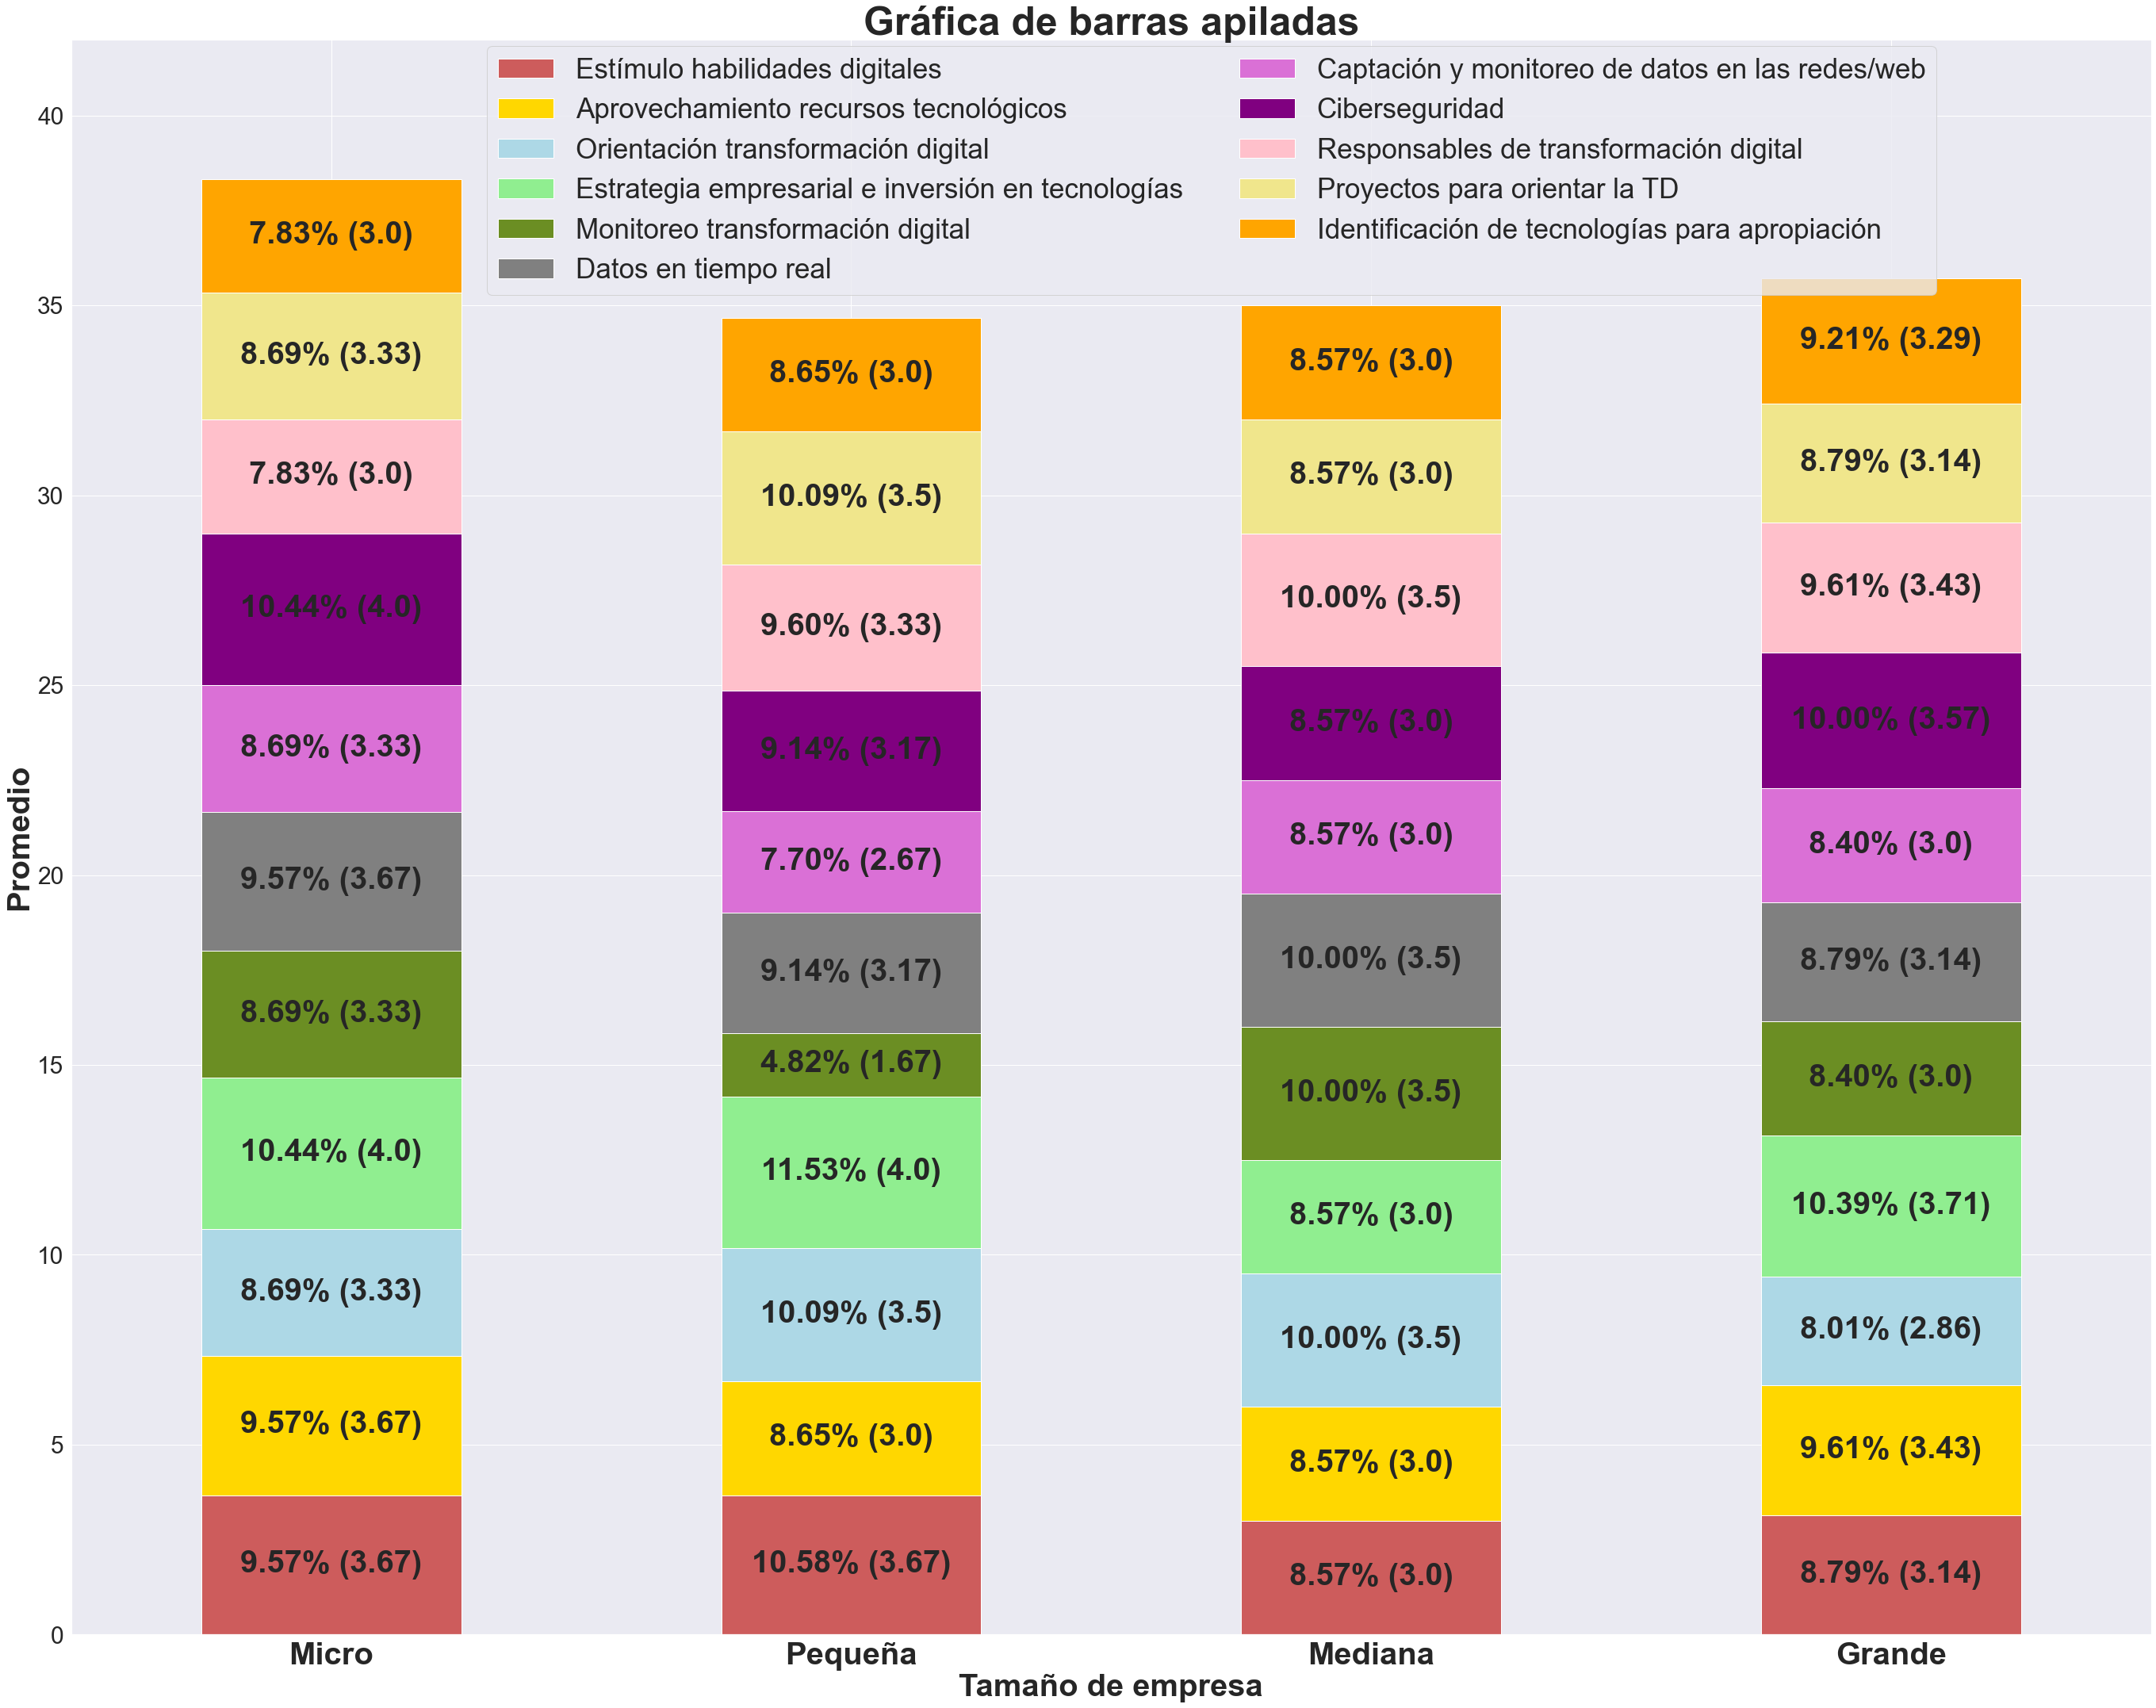

In [19]:
#Gráfico de barras apilado Transformación digital
group_sum_td = round(df.groupby(['Total trabajadores'])['Estímulo habilidades digitales', 'Aprovechamiento recursos tecnológicos', 'Orientación transformación digital', 'Estrategia empresarial e inversión en tecnologías', 'Monitoreo transformación digital', 'Datos en tiempo real', 'Captación y monitoreo de datos en las redes/web', 'Ciberseguridad', 'Responsables de transformación digital  ','Proyectos para orientar la TD','Identificación de tecnologías para apropiación'].mean(), 2)

ax_td = group_sum_td.plot.bar(figsize=(47, 37), stacked=True, color = ['indianred', 'gold', 'lightblue', 'lightgreen', 'olivedrab', 'grey', 'orchid', 'purple', 'pink','khaki', 'orange', 'chocolate'])

ax_td.set_title('Gráfica de barras apiladas', fontsize=50,fontweight = "bold")  # Titulo de la grafica
ax_td.set_ylabel('Promedio', fontsize=40, fontweight = "bold") # Titulo eje y
ax_td.set_xlabel('Tamaño de empresa', fontsize=40, fontweight = "bold") # Titulo eje y
ax_td.set_yticks((0,42), minor = True)
ax_td.legend(loc = (0.2, 0.84), fontsize=35, ncol =2) #ubicación leyenda

ax_td.tick_params(axis="x", rotation=0, labelsize=30)
ax_td.tick_params(axis="y", labelsize=30)
ax_td.grid(True)

abs_values_td = group_sum_td.values
rel_values_td = abs_values_td / abs_values_td.sum(axis=1, keepdims=True) * 100

labels_td = zip(abs_values_td.T.flatten(), rel_values_td.T.flatten())

for path in ax_td.patches:
    abs_value_td, rel_value_td = next(labels_td)
    label_td = f"{rel_value_td:.2f}% ({abs_value_td})"
    width_td, height_td = path.get_width(), path.get_height()
    x_td, y_td = path.get_xy() 
    ax_td.text(x=x_td+ width_td / 2, 
            y=y_td + height_td / 2, 
            s=label_td,
            horizontalalignment='center', 
            verticalalignment='center', fontweight = "bold", fontsize=40
            )
    ax_td.set_xticklabels(("Micro", "Pequeña", "Mediana", "Grande"), fontsize = 40, fontweight = "bold")

plt.savefig("Acercamiento TD por Tamaño de empresa" +".png", dpi=500)
plt.show()


<ipython-input-23-fdb8658397cf>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum_factores = round(df.groupby(['Total trabajadores'])['Capacidad de almacenamiento y gestión de datos ', 'Inversión de capital inicial', 'Costos de operación y mantenimiento', 'Grado de complejidad', 'Experiencia por apropiaciones previas', 'Nuevas demandas de productos y servicios', 'Habilidades y experiencias previas del TH', 'Infraestructura', 'Ciberseguridad.','Interoperabilidad entre programas y equipos','Apoyo de la alta dirección ', 'Estándares para la apropiación de tecnologías 4.0', 'Posibilidad de subcontratación', 'Nivel de desarrollo tecnológico, económico o cultural de la región', 'Cultura laboral enfocada en la innovación y las tecnologías', 'Sencillez en la cuantificación de los beneficios esperados ', 'Condiciones de trabajo peligrosas/repetitivas', 'Políticas y programas gubernamentales de apoyo', 'Inf

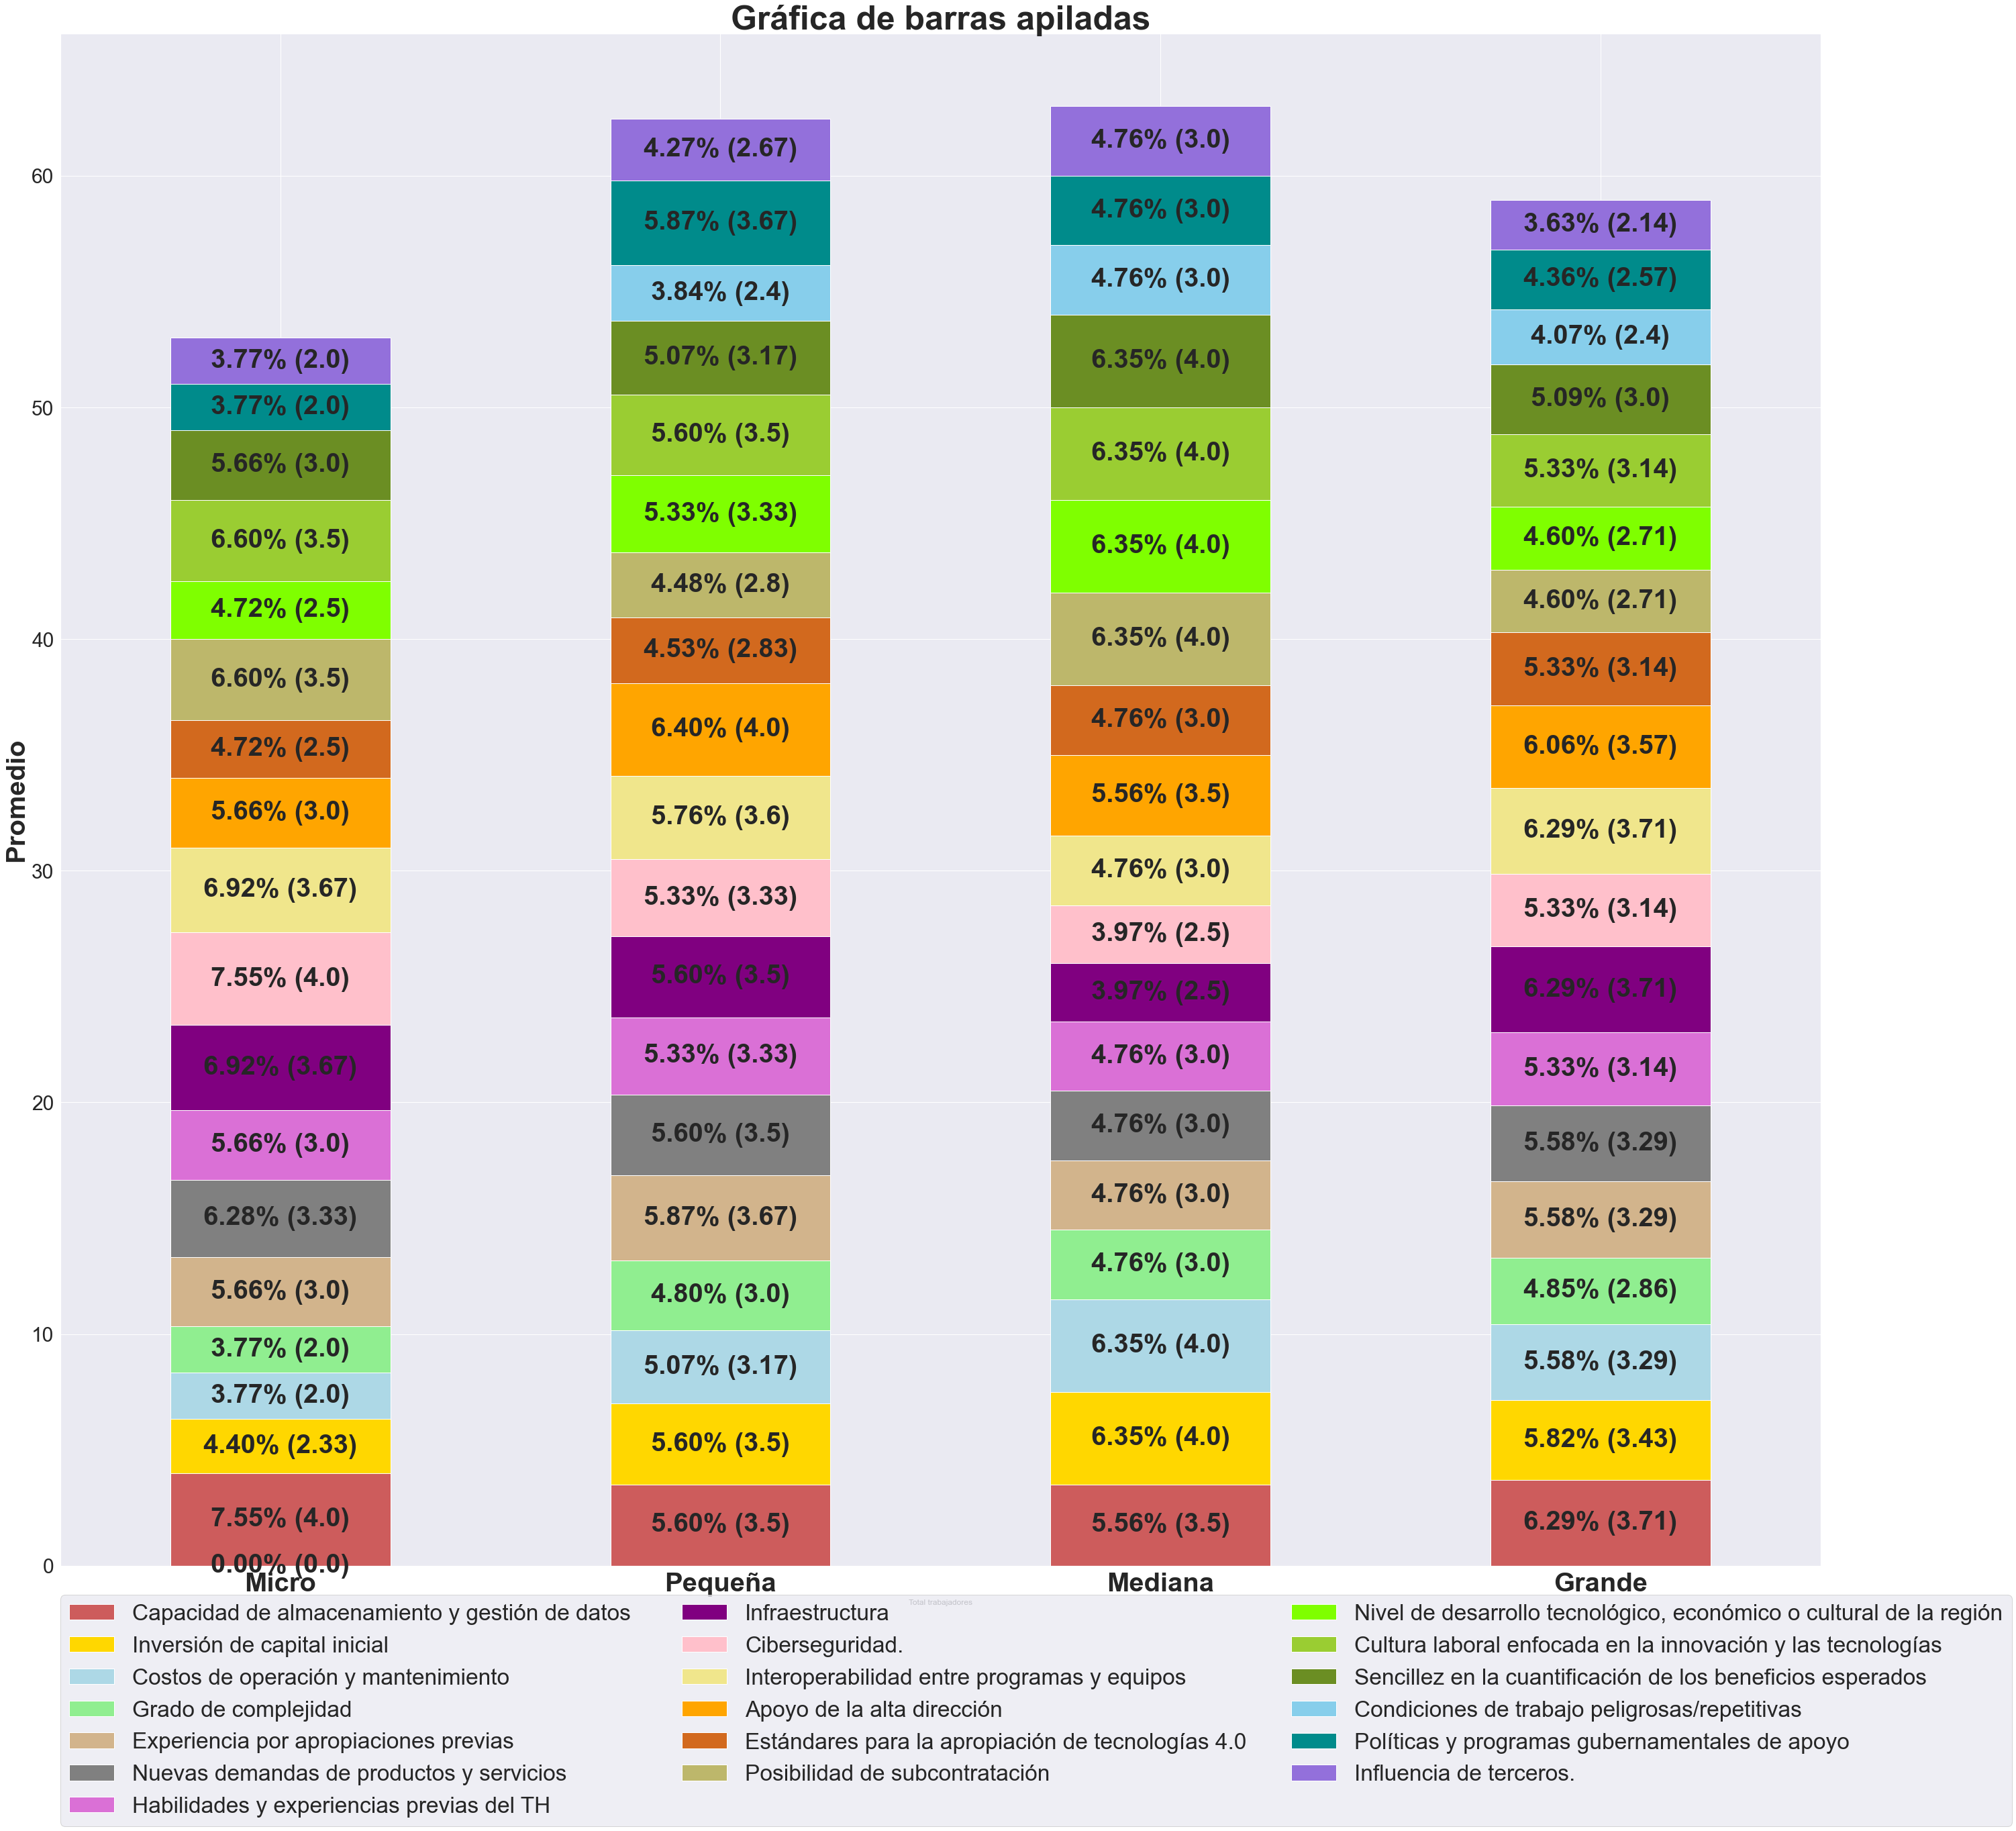

In [23]:
#Gráfico de barras apilado factores.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

group_sum_factores = round(df.groupby(['Total trabajadores'])['Capacidad de almacenamiento y gestión de datos ', 'Inversión de capital inicial', 'Costos de operación y mantenimiento', 'Grado de complejidad', 'Experiencia por apropiaciones previas', 'Nuevas demandas de productos y servicios', 'Habilidades y experiencias previas del TH', 'Infraestructura', 'Ciberseguridad.','Interoperabilidad entre programas y equipos','Apoyo de la alta dirección ', 'Estándares para la apropiación de tecnologías 4.0', 'Posibilidad de subcontratación', 'Nivel de desarrollo tecnológico, económico o cultural de la región', 'Cultura laboral enfocada en la innovación y las tecnologías', 'Sencillez en la cuantificación de los beneficios esperados ', 'Condiciones de trabajo peligrosas/repetitivas', 'Políticas y programas gubernamentales de apoyo', 'Influencia de terceros.'].mean(), 2)
ax_factores = group_sum_factores.plot.bar(figsize=(47, 42), stacked=True, color = ['indianred', 'gold', 'lightblue', 'lightgreen', 'tan', 'grey', 'orchid', 'purple', 'pink','khaki', 'orange', 'chocolate', 'darkkhaki', 'chartreuse', 'yellowgreen', 'olivedrab', 'skyblue', 'darkcyan', 'mediumpurple'])

ax_factores.set_title('Gráfica de barras apiladas', fontsize=50,fontweight = "bold")  # Titulo de la grafica
ax_factores.set_ylabel('Promedio', fontsize=40, fontweight = "bold") # Titulo eje y

ax_factores.legend(loc = (0, -0.17), fontsize=33.5, ncol =3) #ubicación leyenda

ax_factores.tick_params(axis="x", rotation=0, labelsize=30)
ax_factores.tick_params(axis="y", labelsize=30)
ax_factores.grid(True)

abs_values_factores = group_sum_factores.values
rel_values_factores = abs_values_factores / abs_values_factores.sum(axis=1, keepdims=True) * 100

labels_factores = zip(abs_values_factores.T.flatten(), rel_values_factores.T.flatten())

for path in ax_factores.patches:
    
    abs_value_factores, rel_value_factores = next(labels_factores)
    label_factores = f"{rel_value_factores:.2f}% ({abs_value_factores})"
    width_factores, height_factores = path.get_width(), path.get_height()
    x_factores, y_factores = path.get_xy() 
    
    ax_factores.text(x=x_factores + width_factores / 2, y=y_factores + height_factores / 2,
                     s=label_factores,horizontalalignment='center', verticalalignment='center', fontweight = "bold",
                     fontsize=40)
    
    ax_factores.set_xticklabels(("Micro", "Pequeña", "Mediana", "Grande"), fontsize = 40, fontweight = "bold")

plt.savefig("Factores de apropiación por Tamaño de empresa" +".png", dpi=500)
plt.show()

<ipython-input-13-5214d5d2db15>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_sum_t40 = round(df.groupby(['Total trabajadores'])["Computación en la nube", "Analítica de datos", "Big Data", "Robótica y automatización", "Internet de las cosas",


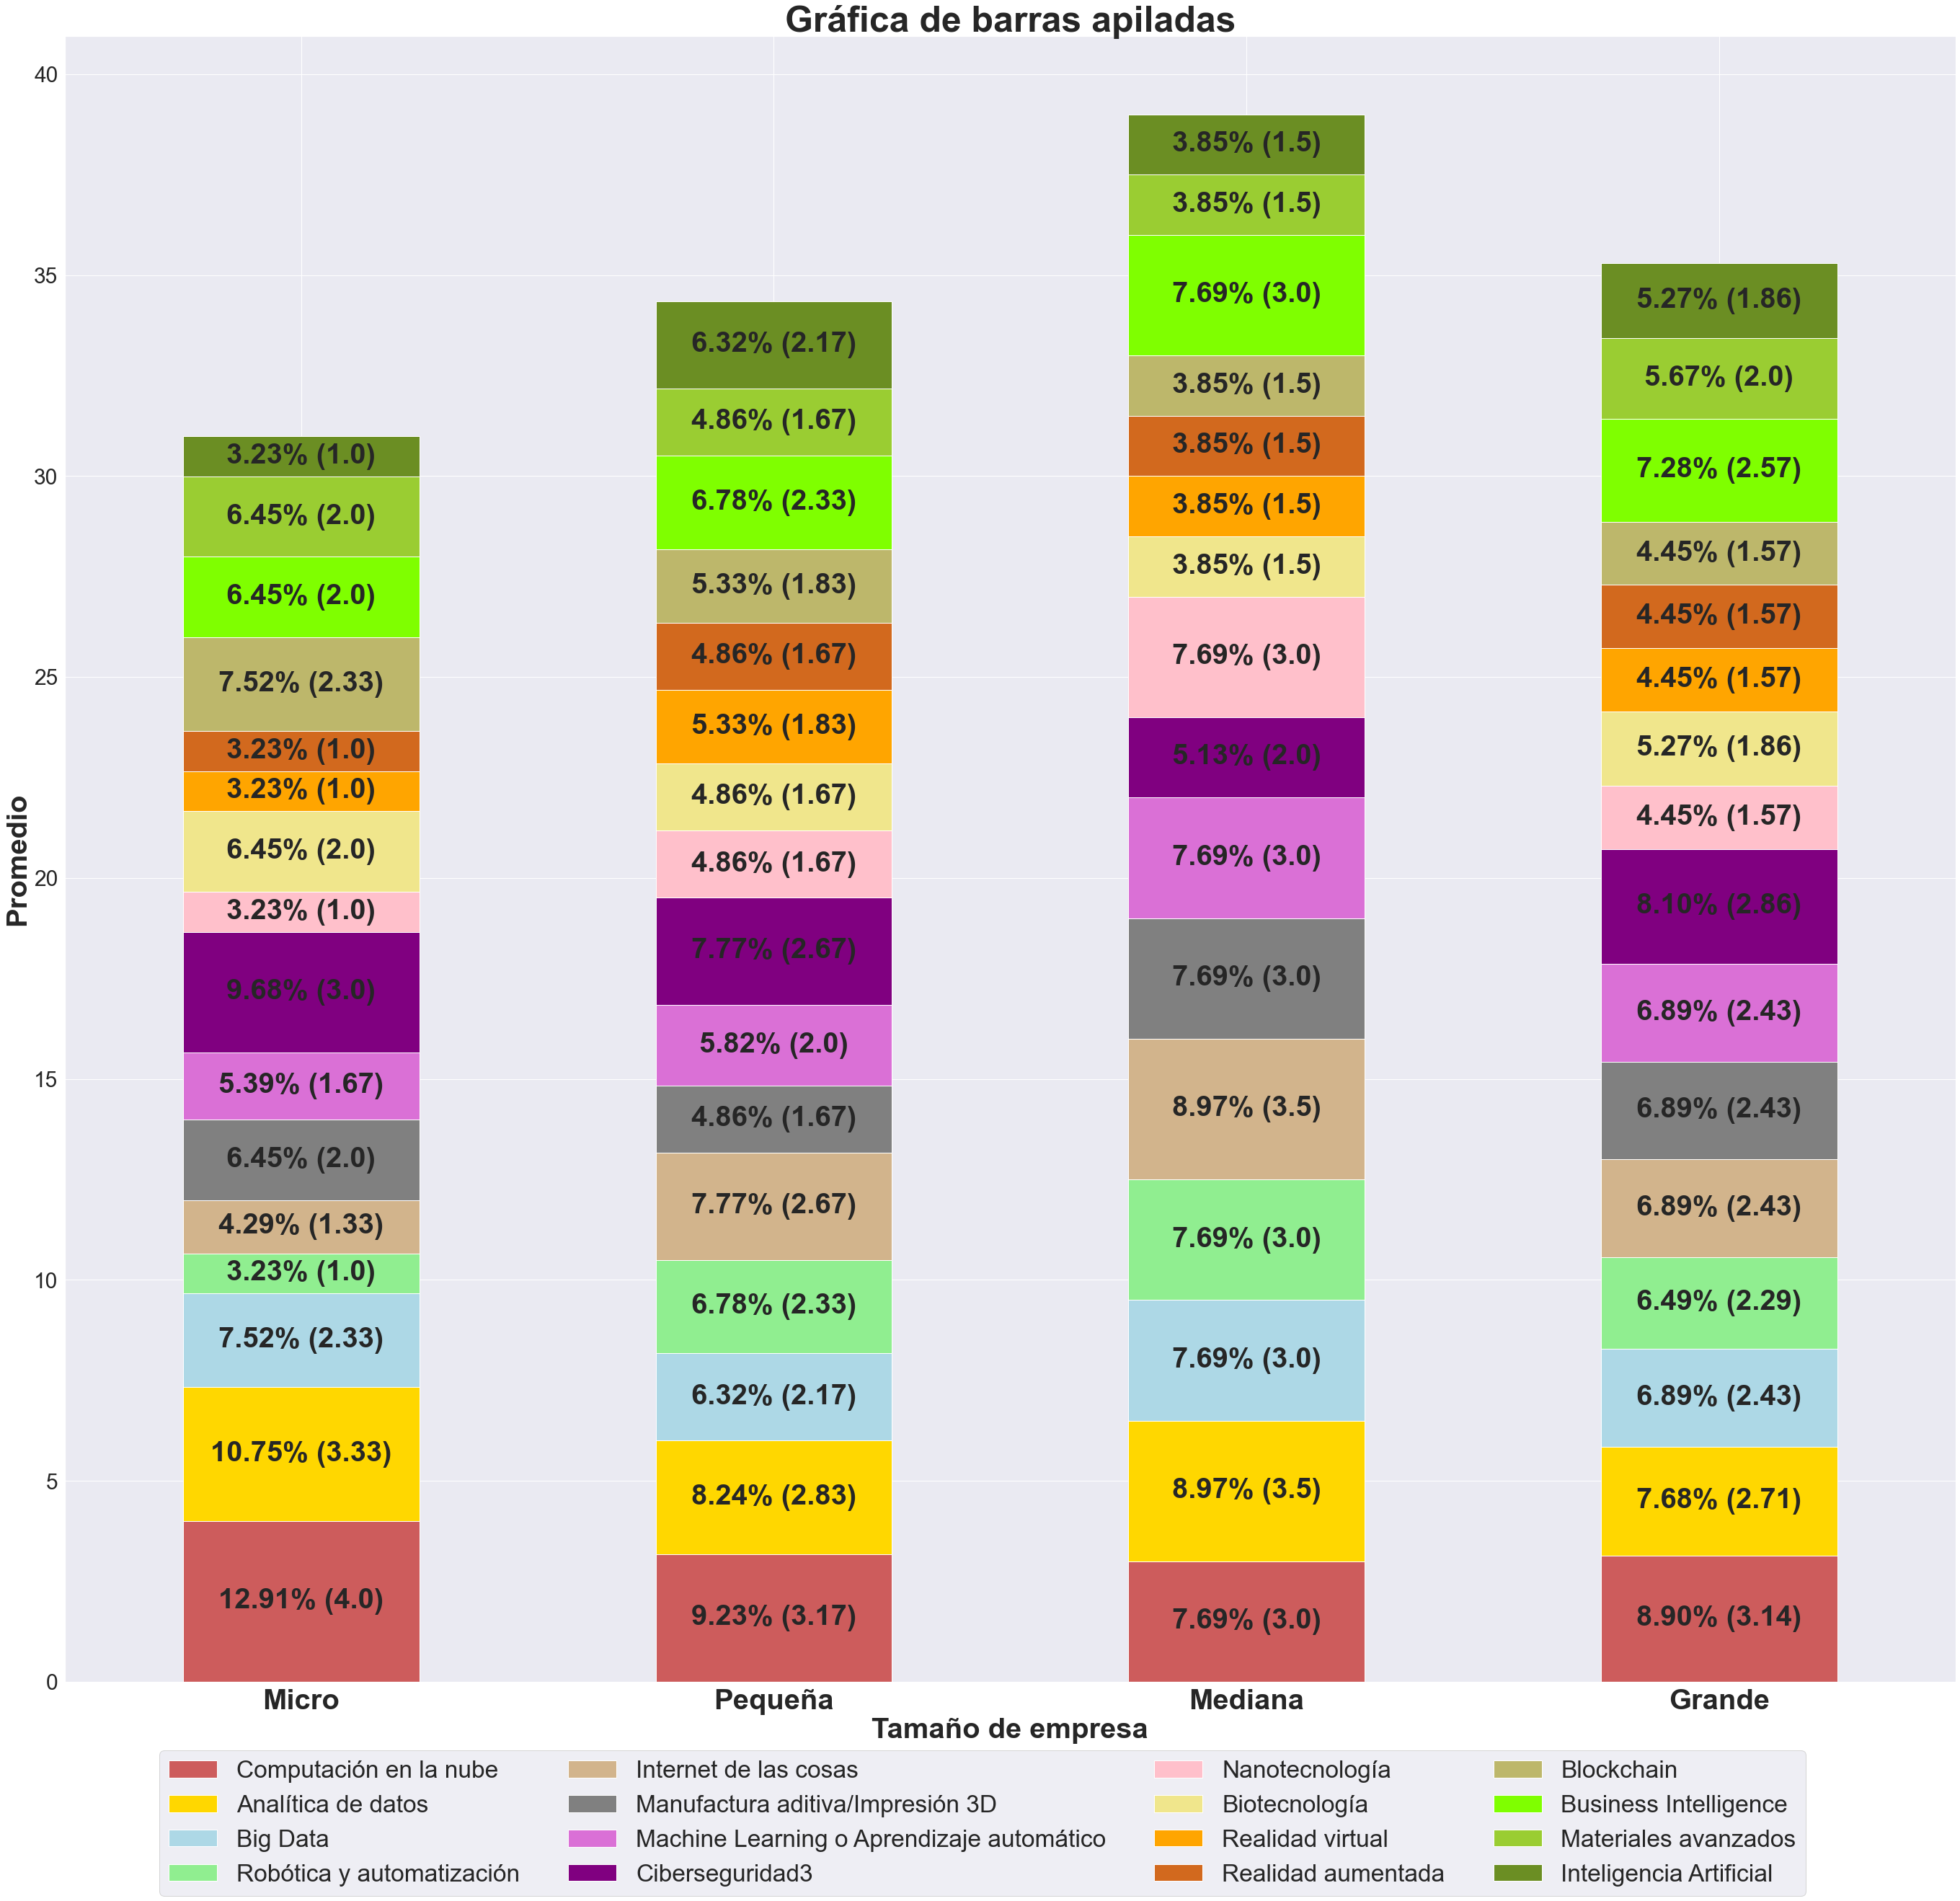

In [13]:
#Gráfico de barras apilado Tencologías 4.0.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

group_sum_t40 = round(df.groupby(['Total trabajadores'])["Computación en la nube", "Analítica de datos", "Big Data", "Robótica y automatización", "Internet de las cosas", 
               "Manufactura aditiva/Impresión 3D", "Machine Learning o Aprendizaje automático", "Ciberseguridad3", 
               "Nanotecnología", "Biotecnología", "Realidad virtual", "Realidad aumentada", "Blockchain","Business Intelligence", 
               "Materiales avanzados", "Inteligencia Artificial"].mean(), 2)
ax_t40 = group_sum_t40.plot.bar(figsize=(47, 42), stacked=True, color = ['indianred', 'gold', 'lightblue', 'lightgreen', 'tan', 'grey', 'orchid', 'purple', 'pink','khaki', 'orange', 'chocolate', 'darkkhaki', 'chartreuse', 'yellowgreen', 'olivedrab'])

ax_t40.set_title('Gráfica de barras apiladas', fontsize=50,fontweight = "bold")  # Titulo de la grafica
ax_t40.set_ylabel('Promedio', fontsize=40, fontweight = "bold") # Titulo eje y
ax_t40.set_xlabel('Tamaño de empresa', fontsize=40, fontweight = "bold") # Titulo eje x

ax_t40.legend(loc = (0.05, -0.13), fontsize=33.5, ncol =4) #ubicación leyenda

ax_t40.tick_params(axis="x", rotation=0, labelsize=30)
ax_t40.tick_params(axis="y", labelsize=30)
ax_t40.grid(True)

abs_values_t40 = group_sum_t40.values
rel_values_t40 = abs_values_t40 / abs_values_t40.sum(axis=1, keepdims=True) * 100

labels_t40 = zip(abs_values_t40.T.flatten(), rel_values_t40.T.flatten())

for path in ax_t40.patches:
    
    abs_value_t40, rel_value_t40 = next(labels_t40)
    label_t40 = f"{rel_value_t40:.2f}% ({abs_value_t40})"
    width_t40, height_t40 = path.get_width(), path.get_height()
    x_t40, y_t40 = path.get_xy() 
    
    ax_t40.text(x=x_t40 + width_t40 / 2, y=y_t40 + height_t40 / 2,
                     s=label_t40,horizontalalignment='center', verticalalignment='center', fontweight = "bold",
                     fontsize=40)
    
    ax_t40.set_xticklabels(("Micro", "Pequeña", "Mediana", "Grande"), fontsize = 40, fontweight = "bold")

plt.savefig("Tecnologías 4.0 por Tamaño de empresa" +".png", dpi=500)
plt.show()

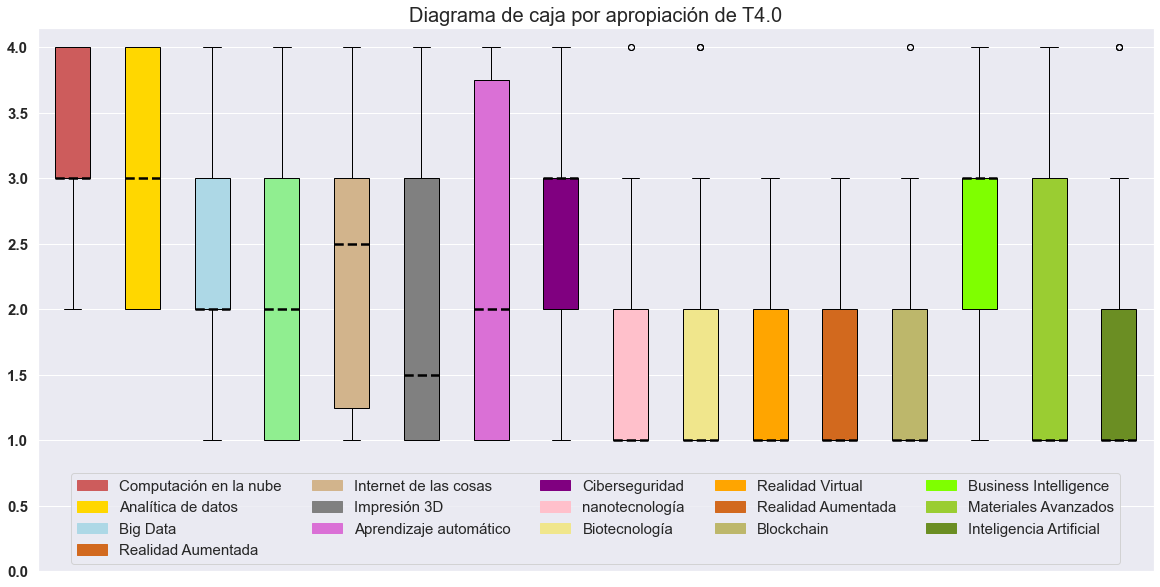

In [7]:
#Gráfico de caja y bigotes tecnologías 4.0
import matplotlib.patches as mpatches

#datos
yt40 = (df["Computación en la nube"], df["Analítica de datos"], df["Big Data"], df["Robótica y automatización"], df["Internet de las cosas"], df["Manufactura aditiva/Impresión 3D"], df["Machine Learning o Aprendizaje automático"], df["Ciberseguridad3"], df["Nanotecnología"], df["Biotecnología"], df["Realidad virtual"], df["Realidad aumentada"], df["Blockchain"], df["Business Intelligence"], df["Materiales avanzados"], df["Inteligencia Artificial"])
datat40 = pd.DataFrame(yt40).transpose()

fig_t40, ax_t40 = plt.subplots(figsize = (20, 10))
box = ax_t40.boxplot(x = datat40, patch_artist=True, medianprops = dict(linestyle='--', linewidth=2.5, color='black')) 

#asignar color a cada box
colors = ['indianred', 'gold', 'lightblue', 'lightgreen', 'tan', 'grey', 'orchid', 'purple', 'pink','khaki', 'orange', 'chocolate', 'darkkhaki', 'chartreuse', 'yellowgreen', 'olivedrab']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

#ejes y título
plt.xticks(rotation = 90, fontsize = 15, weight = 'bold')
ax_t40.get_xaxis().set_visible(False)
plt.yticks(fontsize = 15, weight = "bold")
ax_t40.set_yticks((0,4), minor = True)
plt.title("Diagrama de caja por apropiación de T4.0", fontsize = 20)


#set colors legend
cn = mpatches.Patch(color='indianred', label='Computación en la nube')
ad = mpatches.Patch(color='gold', label='Analítica de datos')
bd = mpatches.Patch(color='lightblue', label='Big Data')
ra = mpatches.Patch(color='lightgreen', label='Robótica y automatización')
iot = mpatches.Patch(color='tan', label='Internet de las cosas')
i3d = mpatches.Patch(color='grey', label='Impresión 3D')
ml = mpatches.Patch(color='orchid', label='Aprendizaje automático')
cs = mpatches.Patch(color='purple', label='Ciberseguridad')
nt = mpatches.Patch(color='pink', label='nanotecnología')
bt = mpatches.Patch(color='khaki', label='Biotecnología')
rv = mpatches.Patch(color='orange', label='Realidad Virtual')
ra = mpatches.Patch(color='chocolate', label='Realidad Aumentada')
bc = mpatches.Patch(color='darkkhaki', label='Blockchain')
bi = mpatches.Patch(color='chartreuse', label='Business Intelligence')
ma = mpatches.Patch(color='yellowgreen', label='Materiales Avanzados')
ia = mpatches.Patch(color='olivedrab', label='Inteligencia Artificial')


ax_t40.legend(handles=[cn, ad, bd, ra, iot, i3d, ml, cs, nt, bt, rv, ra, bc, bi, ma, ia], ncol = 5, fontsize = 15, loc = "lower center")

plt.savefig('Tecnologías de la industria 4.0.png')

plt.show()

